# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.__version__

'0.23.4'

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv('../utils/FEEDVISOR_cleaned_usage2_FEEDVISOR.csv')

FileNotFoundError: File b'../utils/FEEDVISOR_cleaned_usage2_FEEDVISOR.csv' does not exist

In [5]:
df.head()

,recipe_execution_date,client_id,managed_ad_spend_last_30,back_office_id,total_ad_spend_last_30_currency,managed_ad_spend_last_30_usd,total_ad_spend_last_30_usd,id,lastmodifieddate,marketplace,online_store,managed_ad_spend_last_30_currency,Dsm_ACCOUNT_ID,current_number_of_campaigns,total_ad_spend_last_30,created_date_timestamp,date
0,2019-09-04,1,21.67,3618,NaN,21.67,18750.53,a2D0J000001mqR6UAI,2019-04-16T20:13:08Z,AMAZON,a0Kb000000D8crKEAR,NaN,001b000003kd0RZ,611,18750.53,2019-04-16T20:13:08Z,2019-04-16
1,2019-09-04,1,979.16,3604,NaN,979.16,48550.32,a2D0J000001mqR9UAI,2019-04-16T20:13:08Z,AMAZON,a0Kb000000D8bpoEAB,NaN,001b000003kd0RZ,1442,48550.32,2019-04-16T20:13:08Z,2019-04-16
2,2019-09-04,1,295.40,3534,NaN,295.40,1500.58,a2D0J000001mqRLUAY,2019-04-16T20:13:08Z,AMAZON_UK,a0Kb000000CduP6EAJ,NaN,001b000003nfsGl,49,1500.58,2019-04-16T20:13:08Z,2019-04-16
3,2019-09-04,1,7457.45,3259,NaN,7457.45,25204.33,a2D0J000001mqRlUAI,2019-04-16T20:13:08Z,AMAZON,a0Kb000000C404OEAR,NaN,001b000003NHDh1,270,25204.33,2019-04-16T20:13:08Z,2019-04-16
4,2019-09-04,1,5491.03,3234,NaN,5491.03,16506.34,a2D0J000001mqRnUAI,2019-04-16T20:13:08Z,AMAZON,a0Kb000000C3BzBEAV,NaN,001b000001EhSOT,468,16506.34,2019-04-16T20:13:08Z,2019-04-16


In [6]:
df.dtypes

recipe_execution_date                 object
client_id                              int64
managed_ad_spend_last_30             float64
back_office_id                         int64
total_ad_spend_last_30_currency      float64
managed_ad_spend_last_30_usd         float64
total_ad_spend_last_30_usd           float64
id                                    object
lastmodifieddate                      object
marketplace                           object
online_store                          object
managed_ad_spend_last_30_currency    float64
Dsm_ACCOUNT_ID                        object
current_number_of_campaigns            int64
total_ad_spend_last_30               float64
created_date_timestamp                object
date                                  object
dtype: object

In [7]:
df.shape

(37072, 17)

In [8]:
tmp = df[~df.duplicated()].copy()

In [9]:
tmp.shape

(34912, 17)

In [18]:
tmp.shape

(33036, 13)

In [7]:
df.date = pd.to_datetime(df.date)

In [8]:
len(set(zip(df.Dsm_ACCOUNT_ID, df.date))), len(list(zip(df.Dsm_ACCOUNT_ID, df.date)))

(18976, 37072)

In [9]:
x = pd.concat([df.dtypes, df.nunique()], axis=1)
x.columns=['type', 'uniques']
x['NaN_%'] = (df.isna().sum() / len(df) * 100).round(1)
x['zero_%'] = ((df == 0).sum() / len(df) * 100).round(1)
x.sort_values(by='type')

,type,uniques,NaN_%,zero_%
date,datetime64[ns],128,0.0,0.0
client_id,int64,1,0.0,0.0
back_office_id,int64,319,0.0,0.0
current_number_of_campaigns,int64,1030,0.0,0.0
managed_ad_spend_last_30,float64,9424,0.0,71.0
total_ad_spend_last_30_currency,float64,11546,52.4,8.2
managed_ad_spend_last_30_usd,float64,9426,0.0,71.0
total_ad_spend_last_30_usd,float64,26432,0.0,17.6
total_ad_spend_last_30,float64,26462,0.0,17.6
managed_ad_spend_last_30_currency,float64,4513,52.4,32.6


In [12]:
list(df)

['recipe_execution_date',
 'client_id',
 'managed_ad_spend_last_30',
 'back_office_id',
 'total_ad_spend_last_30_currency',
 'managed_ad_spend_last_30_usd',
 'total_ad_spend_last_30_usd',
 'id',
 'lastmodifieddate',
 'marketplace',
 'online_store',
 'managed_ad_spend_last_30_currency',
 'Dsm_ACCOUNT_ID',
 'current_number_of_campaigns',
 'total_ad_spend_last_30',
 'created_date_timestamp',
 'date']

In [19]:
(df.groupby(['Dsm_ACCOUNT_ID', 'date', 'online_store', 'id', 'back_office_id']).size() > 1).sum() > 0

True

In [20]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/Users/joshfriedlander/miniconda3/envs/old_pandas/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,client_id,managed_ad_spend_last_30,back_office_id,total_ad_spend_last_30_currency,managed_ad_spend_last_30_usd,total_ad_spend_last_30_usd,managed_ad_spend_last_30_currency,current_number_of_campaigns,total_ad_spend_last_30
client_id,nan,nan,nan,nan,nan,nan,nan,nan,nan
managed_ad_spend_last_30,nan,1,0.14,0.26,1,0.32,1,0.12,0.32
back_office_id,nan,0.14,1,0.072,0.14,0.081,0.1,0.14,0.082
total_ad_spend_last_30_currency,nan,0.26,0.072,1,0.26,1,0.26,0.078,1
managed_ad_spend_last_30_usd,nan,1,0.14,0.26,1,0.32,1,0.12,0.32
total_ad_spend_last_30_usd,nan,0.32,0.081,1,0.32,1,0.26,0.1,1
managed_ad_spend_last_30_currency,nan,1,0.1,0.26,1,0.26,1,0.1,0.26
current_number_of_campaigns,nan,0.12,0.14,0.078,0.12,0.1,0.1,1,0.1
total_ad_spend_last_30,nan,0.32,0.082,1,0.32,1,0.26,0.1,1


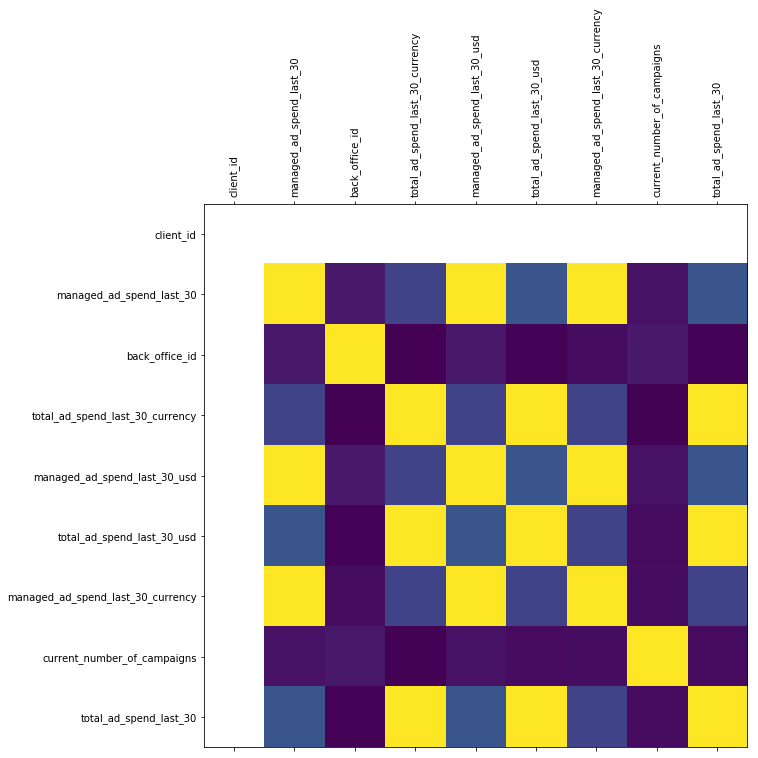

In [21]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10));
ax.matshow(corr);
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);